In [1]:
#Импорт и преднастройка
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport as prfp
%matplotlib inline
from matplotlib import pyplot as plt
from plotly import graph_objects as go
from tqdm import tqdm

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

C:\Users\stu12\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Указали путь к файлу (DataSample.csv) и прочитали его
data_path = r'C:\Users\stu12\OneDrive\Рабочий стол\Аналитик данных 2\Задание 1. Инсайты\DataSample.csv'
df = pd.read_csv(data_path, low_memory=False)

In [3]:
#Меняем тип колонок и дату
df.iloc[:, [4,6,7,8,9,10,11,12]] = df.iloc[:, [4,6,7,8,9,10,11,12]].apply(pd.to_numeric, errors = 'coerce')
df['d_date'] = pd.to_datetime(df['d_date'])

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 21 columns):
 #   Column           Dtype         
---  ------           -----         
 0   receiptid        int64         
 1   kkt_sn           int64         
 2   d_date           datetime64[ns]
 3   name             object        
 4   amount           object        
 5   unit             object        
 6   price            object        
 7   cost             object        
 8   nal              object        
 9   electron         object        
 10  avans            object        
 11  credit           object        
 12  vstrechpredst    object        
 13  Тип региона      object        
 14  Имя региона      object        
 15  Тип города       object        
 16  Имя города       object        
 17  Тип улицы        object        
 18  Имя улицы        object        
 19  Тип номера дома  object        
 20  Номер дома       object        
dtypes: datetime64[ns](1), int64(2)

,receiptid,kkt_sn,d_date,name,amount,unit,price,cost,nal,electron,avans,credit,vstrechpredst,Тип региона,Имя региона,Тип города,Имя города,Тип улицы,Имя улицы,Тип номера дома,Номер дома
0,61379295,108200088416,2018-06-07,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,450.0,450.0,450.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
1,61379296,108200088416,2018-06-07,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,360.0,360.0,360.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
2,61379301,108200088416,2018-06-07,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,250.0,250.0,250.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
3,61429416,108200088416,2018-06-08,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,1500.0,1500.0,1500.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
4,61431313,108200088416,2018-06-08,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,1870.0,1870.0,1870.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""


In [5]:
#Генерируем первичный итоговый отчет
profile = prfp(df.sample(n = 100000, random_state=32), title = 'Итоговый отчет')
profile = profile.to_file(r'C:\Users\stu12\OneDrive\Рабочий стол\Аналитик данных 2\Задание 1. Инсайты\Report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 28.70it/s]


In [6]:
#Запрос 1: топ 5 регионов с кол-вом чеков >= 40.000
df_regions = (df[['Имя региона', 'receiptid']].drop_duplicates().groupby(by='Имя региона').count()).sort_values(by='receiptid')

regions = df_regions[df_regions['receiptid'] >= 40000].index.to_numpy()
regions = list(regions[regions!='0'])
regions[:5]

['Хакасия', 'Рязанская', 'Тверская', 'Курганская', 'Сахалинская']

In [7]:
#Запрос 2: суммы чеков по 20 регионам за весь период по типу платежа
dupl_cols = ['receiptid']
pay_type_cols = ['nal', 'electron', 'avans', 'credit']
region_col = ['Имя региона']

df_pay_type =  df.drop_duplicates(subset = dupl_cols).loc[: , dupl_cols + pay_type_cols + region_col]
mask = df_pay_type[pay_type_cols].sum(axis=1) <=0
df_pay_type = df_pay_type[~mask]

#Группировка по регионам
df_pay = (df_pay_type[region_col + pay_type_cols].groupby(by = region_col).sum())

#Только регионы из списка regions
df_pay = df_pay.T.loc[:, regions].T

df_pay['total'] = df_pay[pay_type_cols].sum(axis=1)
df_pay = df_pay.sort_values(by='total', ascending=False)

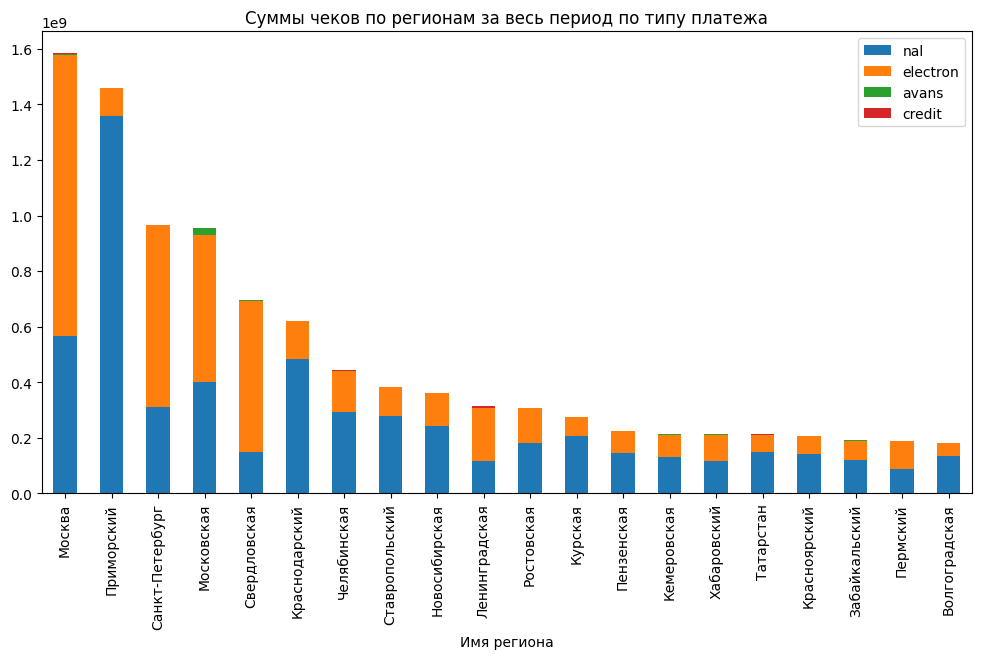

In [8]:
#Диаграмма
region_iloc = 20
df_pay[pay_type_cols].iloc[:region_iloc].plot.bar(stacked=True, figsize=(12, 6))

plt.title('Cуммы чеков по регионам за весь период по типу платежа')
plt.show()

In [9]:
#Запрос 3: средняя сумма чека по 40 регионам за весь период по типу платежа

#Группировка по регионам
df_pay_type['total'] = df_pay_type[pay_type_cols].sum(axis=1)
df_pay = (df_pay_type[region_col+pay_type_cols+['total']].groupby(by=region_col).mean())

#Оставляем только регионы из списка regions
df_pay = df_pay.T.loc[:, regions].T

df_pay = df_pay.sort_values(by = 'total', ascending = False)

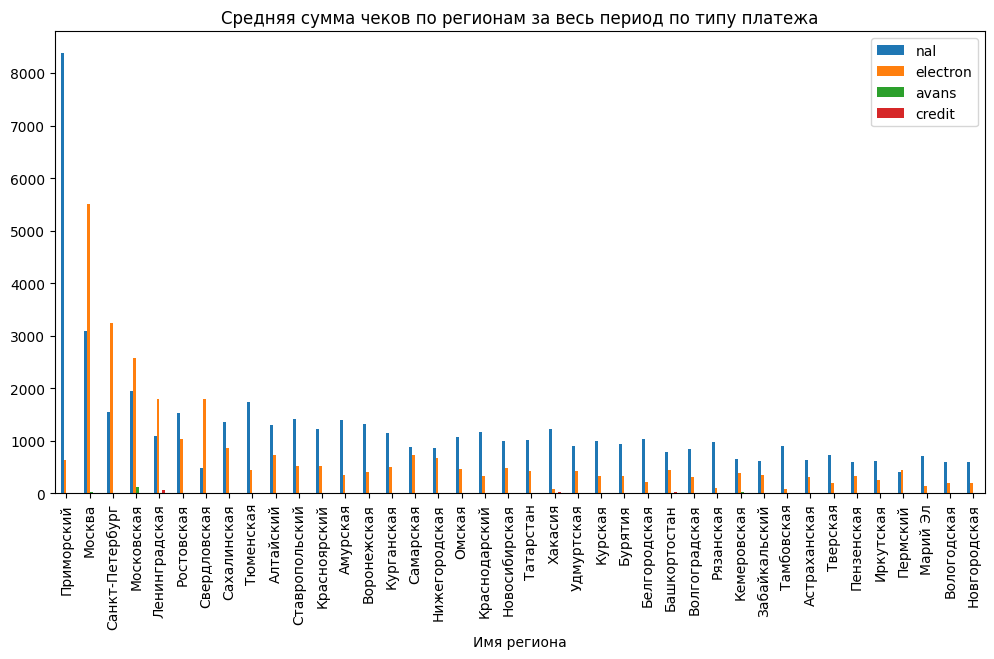

In [10]:
#Диаграмма
region_iloc = 40
df_pay[pay_type_cols].iloc[:region_iloc].plot.bar(stacked = False, figsize = (12, 6))

plt.title('Средняя сумма чеков по регионам за весь период по типу платежа')
plt.show()